In [1]:
import torch
from torch import nn

from separatrix_locator.dynamics.base import DynamicalSystem
from separatrix_locator.core.separatrix_locator import SeparatrixLocator

In [3]:
# Define the dynamics as a torch function
dynamical_function = torch.sin 

# Define Neural network architecture to approximate the Koopman Eigenfunction
model = nn.Sequential(
    nn.Linear(1, 100),
    nn.Tanh(),
    nn.Linear(100, 100),
    nn.Tanh(),
    nn.Linear(100, 1)
)

# Define Separatix Locator object, providing the model a kwarg.
locator = SeparatrixLocator(
    dynamics_dim=1,
    models=[model],
    epochs=200, # training epochs (same as steps)
    verbose=True,
)

# Choose a sampling distribution for initial conditions (mean 0, std 1)
distribution = torch.distributions.Uniform(low=torch.tensor([-4.0]), high=torch.tensor([4.0]))

# Train models to learn Koopman eigenfunctions
locator.fit(dynamical_function, distribution)

Training 1 models...
Training model 1/1
Epoch 0, Loss: 0.8404377102851868, Normalised losses: [0.8341515064239502], Regularisation term values: [], Balance losses: [0.6286227703094482], param norm: 13.441726684570312, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 10, Loss: 0.7436379194259644, Normalised losses: [0.7432845234870911], Regularisation term values: [], Balance losses: [0.03533695638179779], param norm: 2.434124708175659, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 20, Loss: 0.5801101922988892, Normalised losses: [0.5793829560279846], Regularisation term values: [], Balance losses: [0.07272206991910934], param norm: 5.791117191314697, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 30, Loss: 0.11721472442150116, Normalised losses: [0.11687986552715302], Regularisation term values: [], Balance losses: [0.03348588943481445], param norm: 17.566883087158203, Learning Rate: 0.0001, len(model.parameters()): 6, 
Epoch 40, Loss: 0.0210114046931266

SeparatrixLocator(epochs=200,
                  models=[Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Tanh()
  (4): Linear(in_features=100, out_features=1, bias=True)
)],
                  verbose=True)

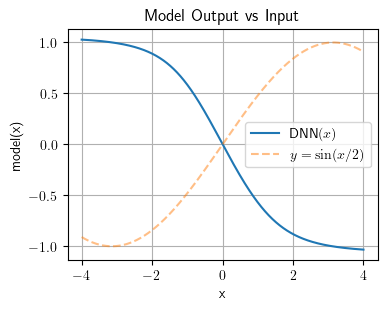

In [4]:
model = locator.models[0]
model.to('cpu')
import numpy as np
import matplotlib.pyplot as plt

x = torch.linspace(-4, 4, 1000)[:,None]
with torch.no_grad():
    y = model(x)

plt.figure(figsize=(4,3))
plt.plot(x, y, label=r'$\text{DNN}(x)$')
plt.plot(x, torch.sin(x/2), '--', label=r'$y=\sin(x/2)$', alpha=0.5)

plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('model(x)')
plt.title('Model Output vs Input')
plt.show()



In [3]:
torch.nn.Linear(dynamics.dim, 1)

Linear(in_features=1, out_features=1, bias=True)

In [4]:
dynamics.name

'CubicBistable1D'